#### Lesson Objective:
* learn how to read a video in Python
* learn how to separate background from moving objects using Non-negative Matrix Factorization

In [2]:
# import common modules
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

#### Reading Video

In [3]:
# set the path
video_path = os.path.join('data','MAH08632.MP4')

Unfortunately, Anaconda installation does not provide a package which reads `.mp4` directly. (`scikit-image` can read `.tiff` sequences). A useful package to do that is `imageio` which can be installed separately:
    
```
conda install -c menpo imageio=1.5.0
```

In [4]:
# import and test the presence of 'ffmpeg'
import imageio
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg-osx-v3.2.4' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-osx-v3.2.4 (33.8 MB)
Downloading: 8192/35458856 bytes (0.0606208/35458856 bytes (1.71712128/35458856 bytes (4.8%2957312/35458856 bytes (8.3%3981312/35458856 bytes (11.25267456/35458856 bytes (14.96709248/35458856 bytes (18.98085504/35458856 bytes (22.89478144/35458856 bytes (26.710887168/35458856 bytes (30.7%12099584/35458856 bytes (34.1%13475840/35458856 bytes (38.0%14745600/35458856 bytes (41.6%16195584/35458856 bytes (45.7%17506304/35458856 bytes (49.4%19013632/35458856 bytes (53.6%20373504/35458856 bytes (57.5%21684224/35458856 bytes (61.2%23027712/35458856 bytes (64.9%24305664/35458856 bytes (68.5%24879104/35458856 bytes (70.2%25911296/35458856 bytes (73.1%27049984/35458856 bytes (76.3%28254208/35458856 bytes (79.7%29384704/35458856 bytes (82.9%30498816/35458856 bytes (86.0%31858688/35458856 bytes (89.8%32989184/

In [5]:
# get a pointer to the video
vid = imageio.get_reader(video_path,'ffmpeg')

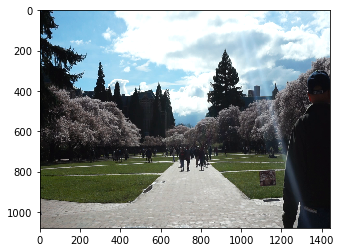

In [6]:
# extract and display the first frame
image = vid.get_data(0)
plt.imshow(image)
m = image.shape[0]
n = image.shape[1]
nofFrames = len(vid)

We will not read the whole video as it will overfill the RAM. We will subsample by 50. We will also read just the first channel, and stack all the pixels in an vector.

In [7]:
# sequence of frames to read
nums = np.linspace(0,nofFrames-1,50)

# read the video frameas and store in a list
video = []
for num in nums:
    video.append(vid.get_data(num)[:,:,0].ravel())

In [8]:
# convert the list to array
data = np.array(video)

In [9]:
data.shape

(50, 1555200)

#### Background Separation via NMF

In [10]:
# we hope that the background will correspond to the first component
n_components = 1


# perform NMF
from sklearn.decomposition import NMF
model = NMF(init="nndsvd", n_components=n_components, random_state=1)
W_matrix = model.fit_transform(data)
H_matrix = model.components_

(-0.5, 1439.5, 1079.5, -0.5)

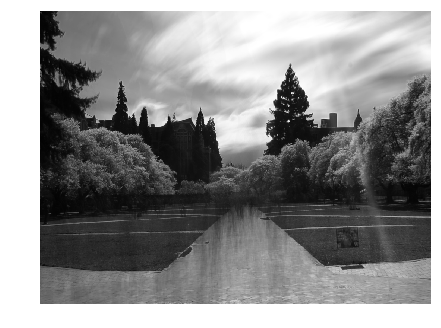

In [11]:
plt.figure(figsize = (7,7))
plt.imshow(H_matrix.reshape(m,n,n_components)[:,:,0],cmap = 'gray')
plt.axis('off')

#### Tips for working with large videos:
* consider memory mapping the video to a file on disk when the video cannot fit in RAM 
* store them as `.hdf5` to allow quick individual access to frames
* use out-of-core libraries such as `dask.array` to do operations on individual chunks and combine the results